In [2]:
import networkx as nx
import networkx.algorithms.core as core

import matplotlib.pyplot as plt

import numpy as np

import pickle

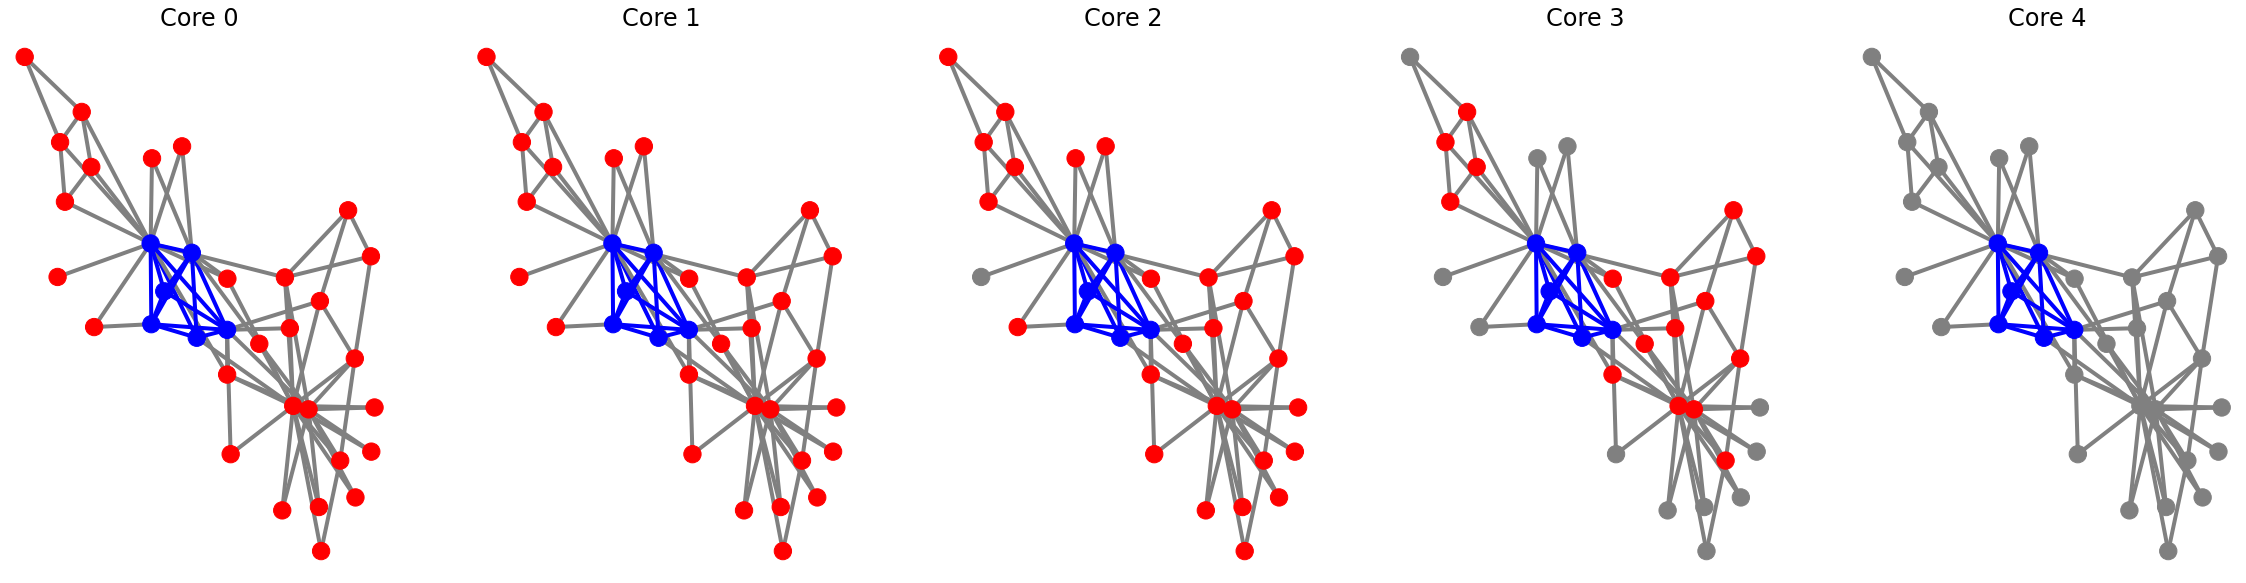

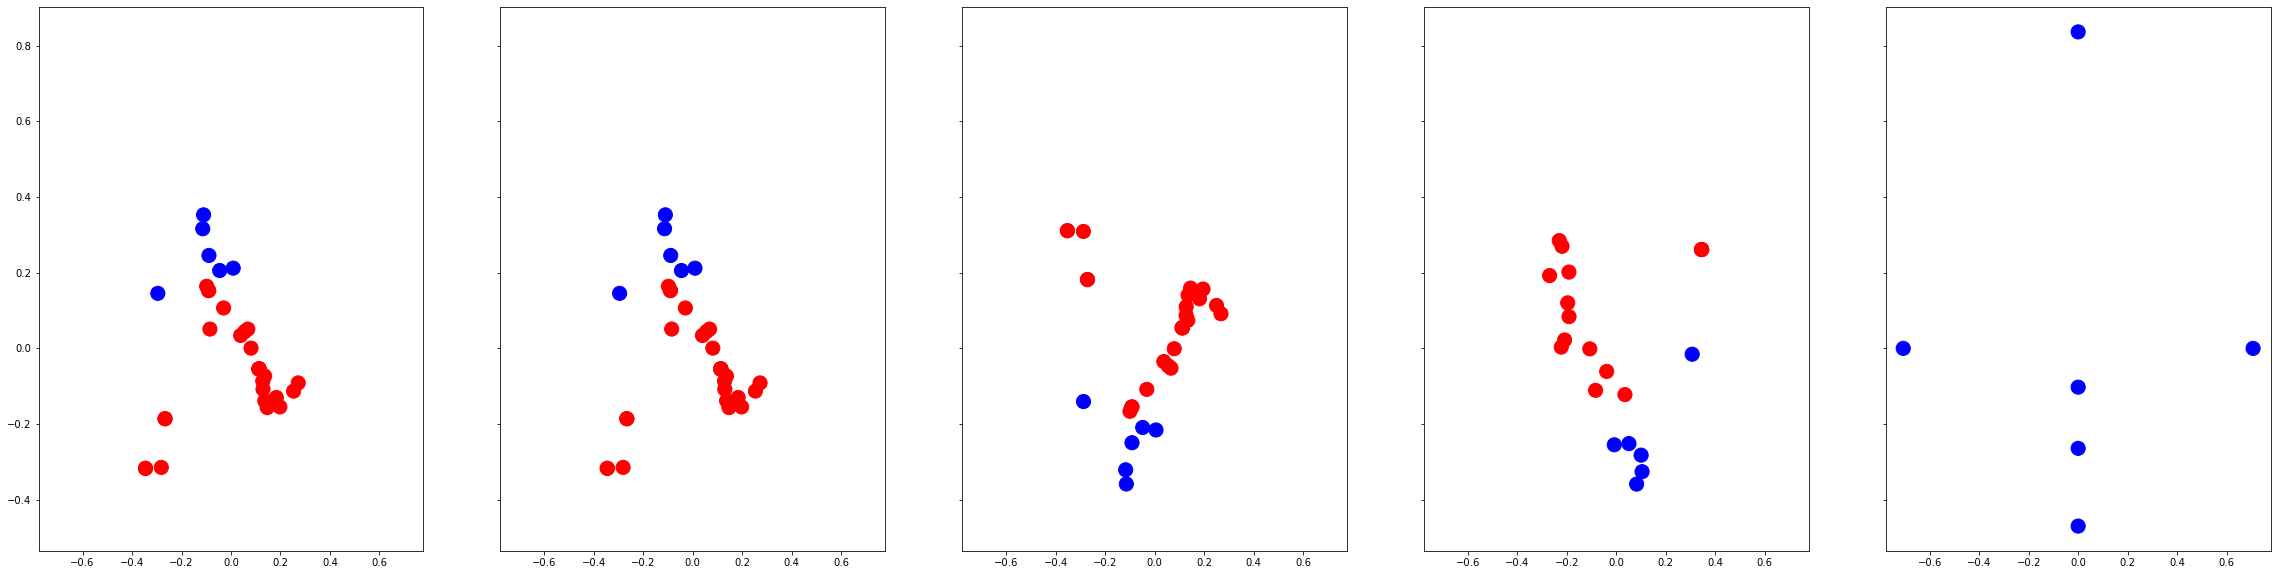

In [8]:
def is_max_core_edge(edge, core_numbers, max_core_num):
    '''
        Returns true if both edge nodes are in the max core 
    '''
    return (core_numbers[edge[0]] == max_core_num) and (core_numbers[edge[1]] == max_core_num)

karate_nx = nx.read_edgelist("../node2vec/graph/karate.edgelist")
core_numbers = core.core_number(karate_nx) #dict of node:core number
max_core_num = max(core_numbers.values())
fig, axs = plt.subplots(nrows=1, ncols=max_core_num + 1, figsize=(max_core_num*10, 10))
for col in range(max_core_num + 1):
    node_colors = ["blue" if core_numbers[node] == max_core_num
                           else "red" if core_numbers[node] >= col 
                           else "grey"
                   for node in karate_nx]
    edge_colors = ["blue" if is_max_core_edge(edge, core_numbers, max_core_num) else "grey"
                       for edge in list(karate_nx.edges())]
    nx.draw(karate_nx,
            node_color=node_colors,
            edge_color=edge_colors,
            width=4,
            pos=nx.drawing.layout.spring_layout(karate_nx, seed=np.random.RandomState(42)),
            ax=axs[col])
    axs[col].set_title("Core {}".format(str(col)), fontsize=24)
    
### Plot Embeddings
with open("embeddings_copy/karate_embeddings.pickle", "rb") as pickleFile:
    karate_embeddings = pickle.load(pickleFile)["2"][1]["lap"]
with open("cores/karate_cores.pickle", "rb") as pickleFile:
    cores = pickle.load(pickleFile)
fig, axs = plt.subplots(nrows=1, ncols=max_core_num + 1, figsize=(max_core_num*10, 10), sharex=True, sharey=True)

#Hard coded indices to get corresponding embeddings
column_to_embedding_idx = [0, 0, 2, 3, 4]
column_to_core_idx = [0, 0, 1, 2, 3]
for col in range(max_core_num + 1):
    x = []
    y = []
    colors = []
    core_nx = cores[column_to_core_idx[col]]
    for node_idx in range(len(core_nx)):
        node = list(core_nx.nodes())[node_idx]        
        node_embedding = karate_embeddings[column_to_embedding_idx[col]][1][node_idx]
        x.append(node_embedding[0])
        y.append(node_embedding[1])
        if core_numbers[node] == max_core_num:
            colors.append("blue")
        else:
            colors.append("red")
    axs[col].scatter(x, y, c=colors, s=200)

In [3]:

    print(cores)

[<networkx.classes.graph.Graph object at 0x7f075d2065d0>, <networkx.classes.graph.Graph object at 0x7f075b9ff510>, <networkx.classes.graph.Graph object at 0x7f075b9ff550>, <networkx.classes.graph.Graph object at 0x7f075b9ff590>]


In [11]:
with open("embeddings/karate_embeddings.pickle", "rb") as pickleFile:
    print(list(pickle.load(pickleFile)["2"][1].keys()))

['HOPE', 'lap', 'n2v']
